<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/Farah_ADS1_Assignment_Statistics_and_Trends_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load in the data from Local
df_residents_65plus = pd.read_csv('DataGov_Residents_65Plus.csv', index_col='DataSeries')

# Print out the dataframe
print(df_residents_65plus)

                                                      2024    2023    2022  \
DataSeries                                                                   
Total                                               767900  708700  683800   
    Living With Spouse & At Least One Child In ...  271800  243700  255800   
    Living With Spouse, No Children In Household    208600  197000  173900   
    Living Alone In Household                        87200   78100   78600   
    Living With Children But Without Spouse In ...  132000  135800  131700   
    Others                                           68400   54100   43800   
65 - 69 Years                                       279600  265500  263400   
    Living With Spouse & At Least One Child In ...  129600  118300  124500   
    Living With Spouse, No Children In Household     71900   72000   65300   
    Living Alone In Household                        30000   26100   29400   
    Living With Children But Without Spouse In ...   26300   291

In [25]:
# Relational Graph (Scatter Plot)
# Showing the correlation between the number of nursing home beds relates to number of elderly residents (65+).

# Function Name
def plot_relational(df):
    """
    Scatter + regression line showing how the number of nursing home beds relates to
    number of elderly residents (65+).
    """
    plt.figure(dpi=144)
    sns.scatterplot(data=df, x="Residents65Plus", y="NursingHomeBeds")
    sns.regplot(data=df, x="Residents65Plus", y="NursingHomeBeds", scatter=False, color="red")

    # Add Title and Labels
    plt.title("Relation: Elderly Residents vs Nursing Home Beds")
    plt.xlabel("Number of Residents 65+")
    plt.ylabel("Number of Nursing Home Beds")
    plt.tight_layout()

    # Show the Plot
    plt.show()

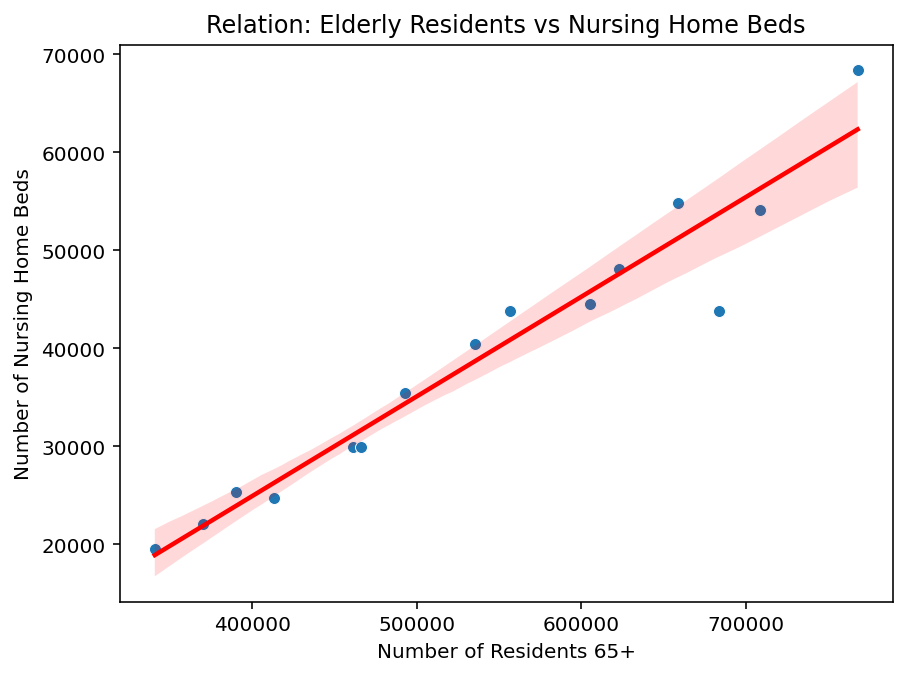

In [24]:
# Relational Graph (Scatter Plot)

# Transpose the DataFrame
df_transposed = df_residents_65plus.T

# Rename the index to 'Year'
df_transposed.index.name = 'Year'

# Create new DataFrame with 'Residents65Plus' (Total) and 'NursingHomeBeds' (Others)
# Select only the first 'Others' column
df_plot = df_transposed[['Total', df_transposed.columns[df_transposed.columns.str.contains('Others', na=False)][0]]].copy()
df_plot = df_plot.rename(columns={'Total': 'Residents65Plus', df_transposed.columns[df_transposed.columns.str.contains('Others', na=False)][0]: 'NursingHomeBeds'})

# Drop duplicate columns, keeping the first one
df_plot = df_plot.loc[:,~df_plot.columns.duplicated(keep='first')].copy()


# Convert the columns to numeric, coercing errors
df_plot['Residents65Plus'] = pd.to_numeric(df_plot['Residents65Plus'], errors='coerce')
df_plot['NursingHomeBeds'] = pd.to_numeric(df_plot['NursingHomeBeds'], errors='coerce')


# Call the plot_relational function with the prepared DataFrame
plot_relational(df_plot)